## Setup
<a id="setup"></a>

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Config
<a id="setup_config"></a>

In [12]:
import assignment.config as config

In [13]:
config.list_available()

['celeba_unnormalized', 'celeba_vaeconv']

### Modules
<a id="setup_modules"></a>

In [14]:
from pathlib import Path

import assignment.scripts.init_exp as init_exp
import assignment.scripts.compute_mean_and_std as compute_mean_and_std
from assignment.evaluation.evaluator import Evaluator
from assignment.training.trainer import Trainer
import assignment.libs.utils_checkpoints as utils_checkpoints
import assignment.libs.utils_data as utils_data
import assignment.visualization.plot as plot
import assignment.visualization.visualize as visualize

### Paths and names
<a id="setup_paths_and_names"></a>

In [15]:
name_exp_vaeconv = "celeba_vaeconv"
name_exp_unnormalized = "celeba_unnormalized"

path_dir_exp_vaeconv = Path(config._PATH_DIR_EXPS) / name_exp_vaeconv

## Data

In [16]:
compute_mean_and_std.compute_mean_and_std(name_config=name_exp_unnormalized, split="training")

Computing mean and standard deviation ...
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_5/assignment/configs/celeba_unnormalized.yaml
Files already downloaded and verified
Dataset
Dataset CelebA
    Number of samples: 162770
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_5/data/celeba
    Split: training
    Transform of samples: Compose(
      PILToTensor()
      CenterCrop(size=[178, 178])
      Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
      ToDtype(
    scale=True
    (transform_tv): ToDtype(scale=True)
  )
)
    Transform of targets: None
Mean: tensor([0.5084, 0.4224, 0.3768])
Standard deviation: tensor([0.3048, 0.2824, 0.2808])
Computing mean and standard deviation finished


In [17]:
compute_mean_and_std.compute_mean_and_std(name_config=name_exp_unnormalized, split="test")

Computing mean and standard deviation ...
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_5/assignment/configs/celeba_unnormalized.yaml
Files already downloaded and verified
Dataset
Dataset CelebA
    Number of samples: 19962
    Path: /home/user/karacora/lab-vision-systems-assignments/assignment_5/data/celeba
    Split: test
    Transform of samples: Compose(
      PILToTensor()
      CenterCrop(size=[178, 178])
      Resize(size=[128, 128], interpolation=InterpolationMode.BILINEAR, antialias=True)
      ToDtype(
    scale=True
    (transform_tv): ToDtype(scale=True)
  )
)
    Transform of targets: None
Mean: tensor([0.5015, 0.4150, 0.3697])
Standard deviation: tensor([0.3061, 0.2822, 0.2801])
Computing mean and standard deviation finished


In [20]:
init_exp.init_exp(name_exp=name_exp_vaeconv, name_config=name_exp_vaeconv)
config.set_config_exp(path_dir_exp_vaeconv)

Initializing experiment celeba_vaeconv...
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_5/experiments/celeba_vaeconv
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_5/experiments/celeba_vaeconv/checkpoints
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_5/experiments/celeba_vaeconv/logs
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_5/experiments/celeba_vaeconv/tensorboard
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_5/experiments/celeba_vaeconv/plots
Created directory /home/user/karacora/lab-vision-systems-assignments/assignment_5/experiments/celeba_vaeconv/visualizations
Config loaded from /home/user/karacora/lab-vision-systems-assignments/assignment_5/assignment/configs/celeba_vaeconv.yaml
Config saved to /home/user/karacora/lab-vision-systems-assignments/assignment_5/experiments/celeba_vaeconv/config.yaml
Initializing 

Files already downloaded and verified


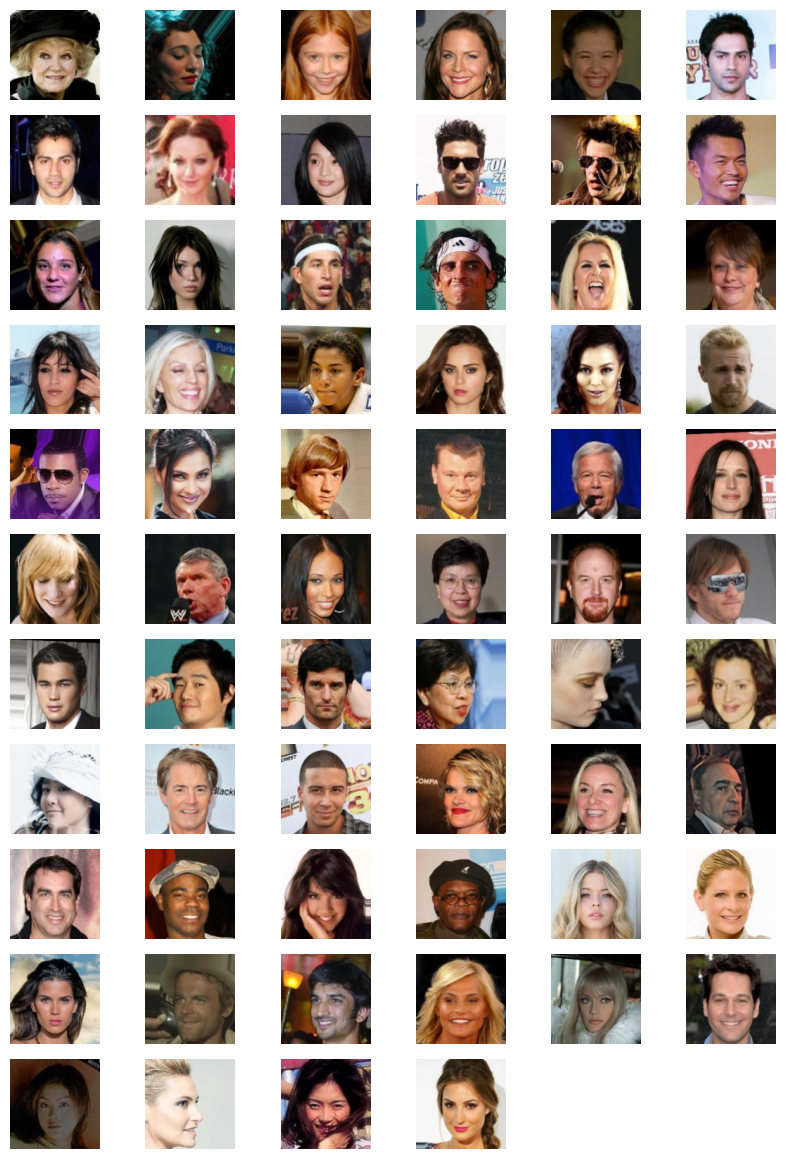

In [21]:
dataset_test, dataloader_test = utils_data.create_dataset_and_dataloader(split="test")
images, _ = utils_data.sample(dataloader_test, num_samples=config.DATA["test"]["dataloader"]["kwargs"]["batch_size"], unnormalize=True)

path_save = path_dir_exp_vaeconv / "visualizations" / "Images_test.png"
visualize.visualize_images(images, path_save=path_save)

Files already downloaded and verified


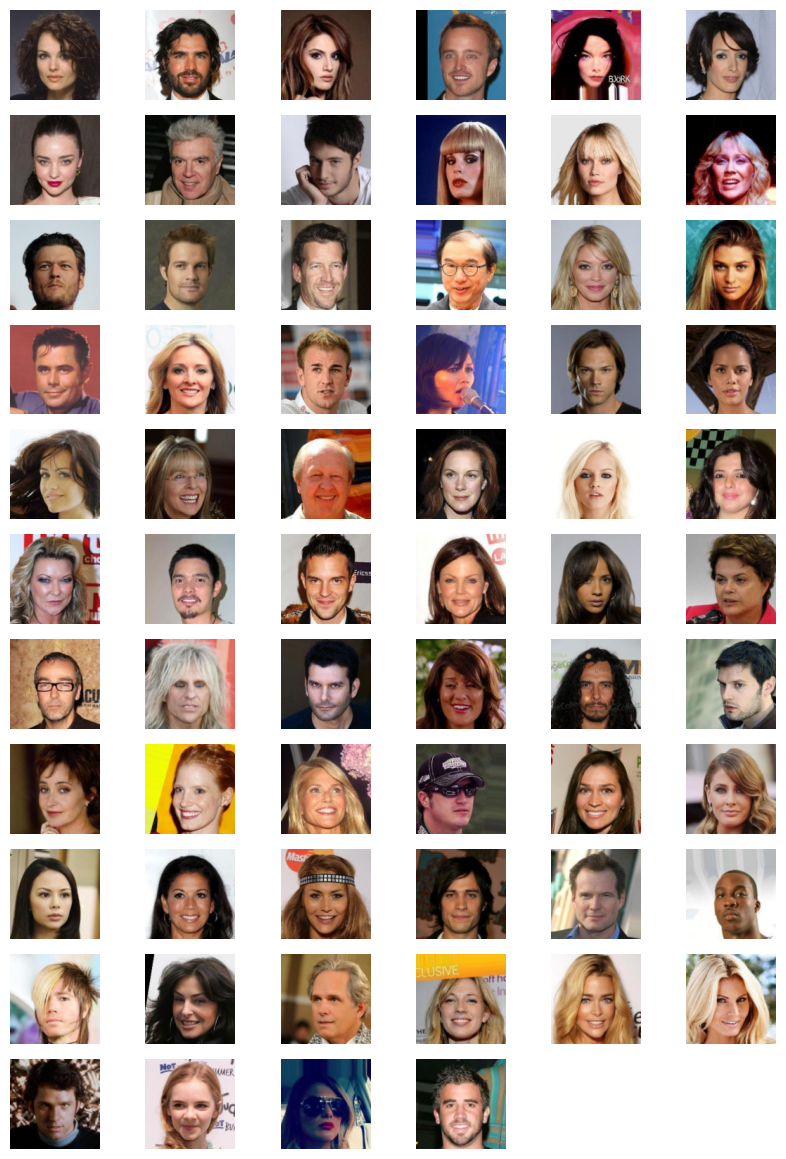

In [22]:
dataset_validation, dataloader_validation = utils_data.create_dataset_and_dataloader(split="validation")
images, _ = utils_data.sample(dataloader_validation, num_samples=config.DATA["validation"]["dataloader"]["kwargs"]["batch_size"], unnormalize=True)

path_save = path_dir_exp_vaeconv / "visualizations" / "Images_validation.png"
visualize.visualize_images(images, path_save=path_save)

Files already downloaded and verified


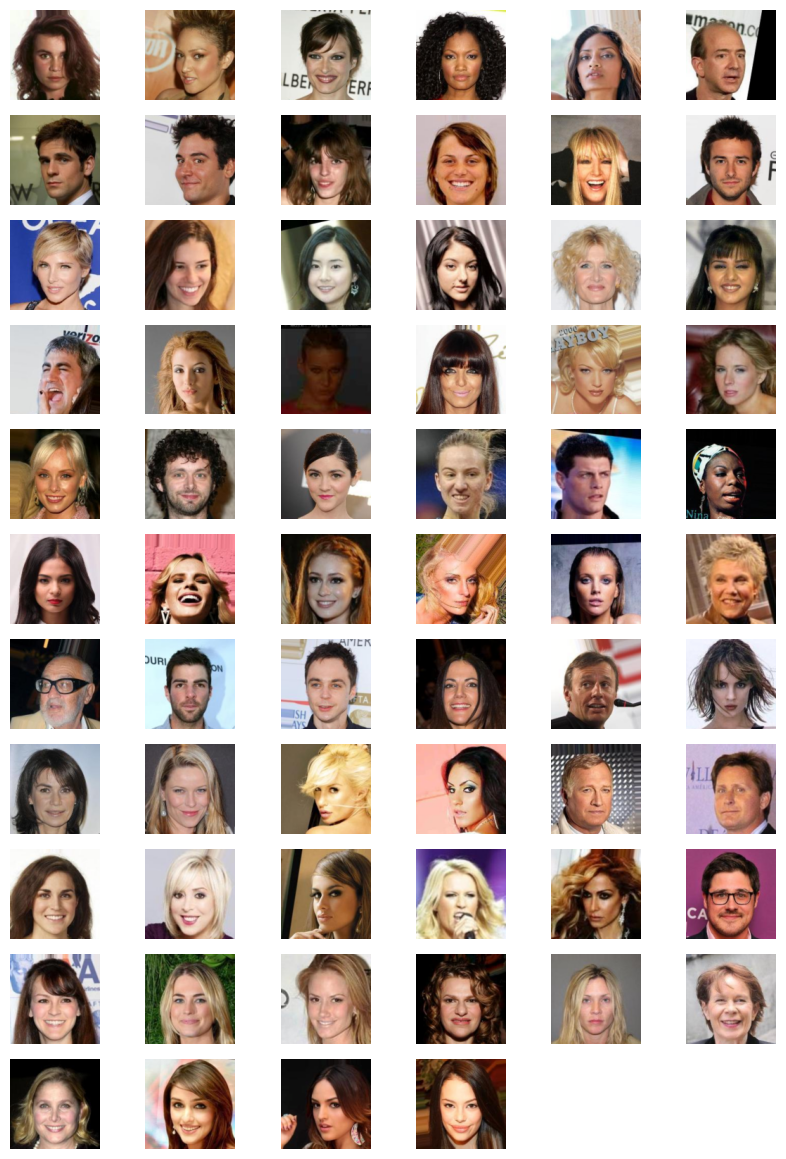

In [23]:
dataset_training, dataloader_training = utils_data.create_dataset_and_dataloader(split="training")
images, _ = utils_data.sample(dataloader_training, num_samples=config.DATA["training"]["dataloader"]["kwargs"]["batch_size"], unnormalize=True)

path_save = path_dir_exp_vaeconv / "visualizations" / "Images_training.png"
visualize.visualize_images(images, path_save=path_save)

Files already downloaded and verified


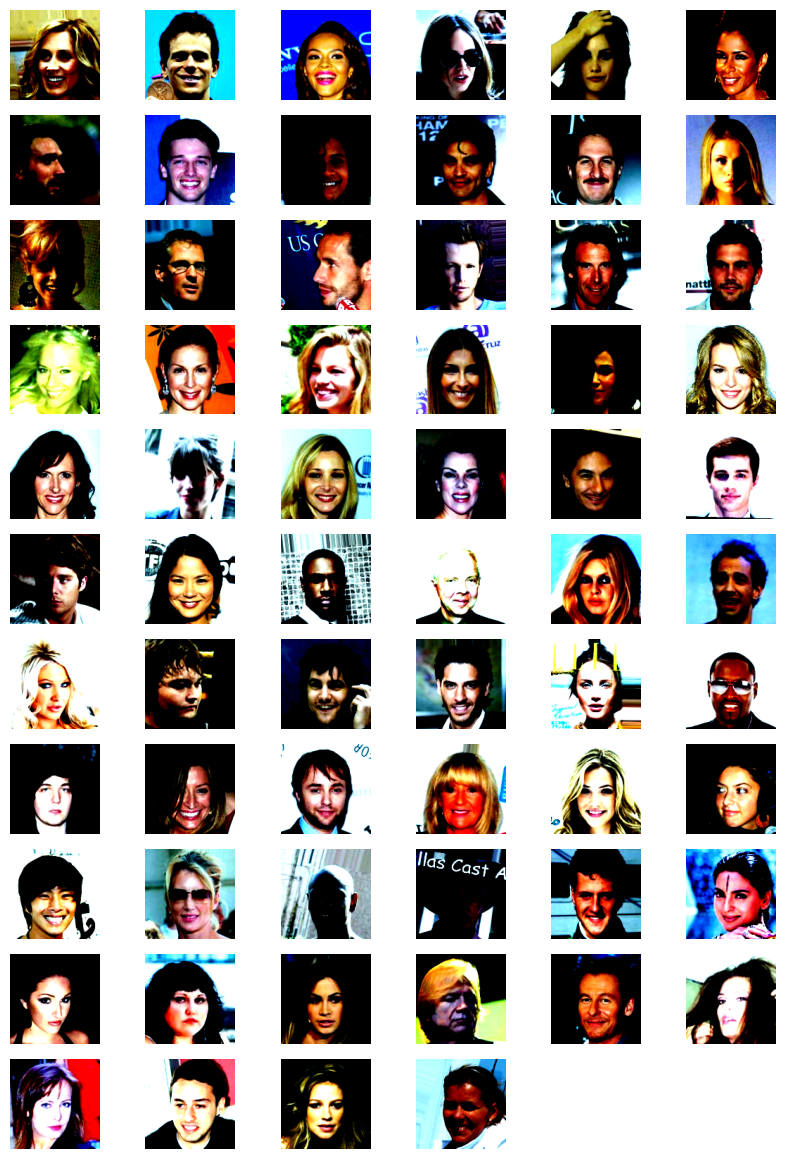

In [24]:
dataset_training, dataloader_training = utils_data.create_dataset_and_dataloader(split="training")
images, _ = utils_data.sample(dataloader_training, num_samples=config.DATA["training"]["dataloader"]["kwargs"]["batch_size"], unnormalize=False)

path_save = path_dir_exp_vaeconv / "visualizations" / "Images_training_normalized.png"
visualize.visualize_images(images, path_save=path_save)

## Experiments

### Vanilla VAE

In [ ]:
init_exp.init_exp(name_exp=name_exp_vaeconv, name_config=name_exp_vaeconv)
config.set_config_exp(path_dir_exp_vaeconv)

In [ ]:
trainer = Trainer(name_exp_vaeconv)
trainer.loop(config.TRAINING["num_epochs"])
log = trainer.log

path_plots = name_exp_vaeconv / "plots"
plot.plot_loss(log, path_save=path_plots / "Loss.png")
plot.plot_metrics(log, path_save=path_plots / "Metrics.png")

In [ ]:
_, model, _, _ = utils_checkpoints.load(path_dir_exp_vaeconv / "checkpoints" / "final.pth")

evaluator = Evaluator(name_exp_vaeconv, model)
print(evaluator)
evaluator.evaluate()

print(f"Loss on test data: {evaluator.log["total"]["loss"]}")
print(f"Metrics on test data")
for name, metrics in evaluator.log["total"]["metrics"].items():
    print(f"    {name:<10}: {metrics}")